# Dimensionality Reduction

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [5]:
%matplotlib inline

# Applying PCA

- Recognize high-dimensionality data
- Choose ideal reduced dimensions
- Apply PCA transform before feeding data to next model

# Digits Dataset

In [6]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

# Exercise 1

We intend to project the 64-dimensional `digits` dataset (captured in in `X` above) to 2 dimensions.

1. Create a relevant `PCA` model in `pca` (Please leave the `random_state` variable for predictability in validating responses)
2. Use `pca` to project the 64-D data to 2-D (`Xproj`)
3. Check the shapes of both `X` and `Xproj`. It should have reduced from (1797, 64) to (1797, 2)

In [7]:
pca = PCA(n_components=2,
          random_state=1)  # project from 64 to 2 dimensions
Xproj = pca.fit_transform(X)

print(X.shape)
print(Xproj.shape)

(1797, 64)
(1797, 2)


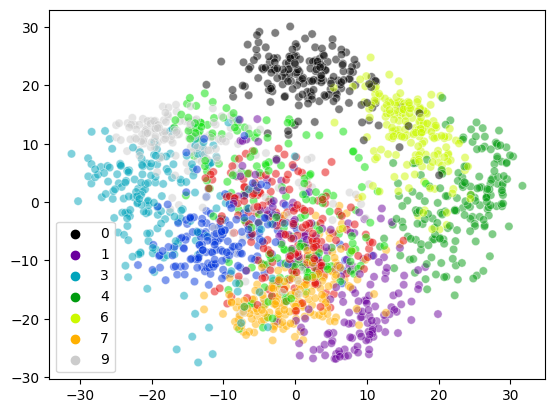

In [8]:
sns.scatterplot(x=Xproj[:, 0], y=Xproj[:, 1], hue=y, alpha=0.5,
                palette=plt.cm.get_cmap('nipy_spectral', 10));

# Effect of PCA

# Exercise 2

We now try visually analyze the affect that the dimension reduction had on the quality of the data. We do this by what compare what a digit looked like before and after transforming. The `make2D()` function from earlier is already defined for your use.
1. Inverse transform the `Xproj` data back to 64-D
2. Show the 'before transformation' digit
    - The `plt.imshow()` function is already provided
    - Select the digit at `idx` from `X`
    - Make sure to convert it to 2-D before passing it to `plt.imshow()`
3. Do the same thing for the transformed data `X_` and observe the data loss.

In [9]:
def make2D(digit):
    'Reshapes a len 64 digit data into an 8x8 2D'
    return digit.reshape((8,8))

In [10]:
X_ = pca.inverse_transform(Xproj)

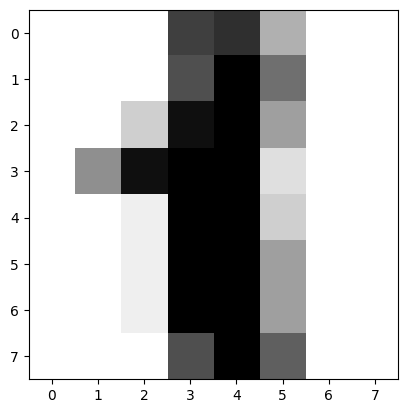

In [11]:
# Original digit
idx = 1
plt.imshow(make2D(X[idx]),
           cmap=plt.cm.binary)

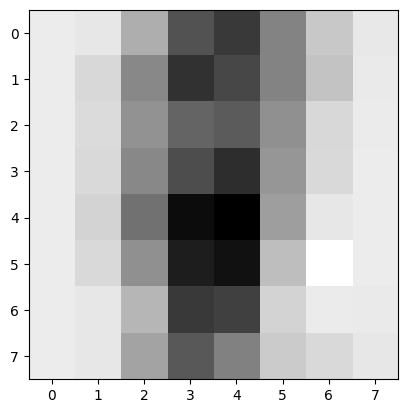

In [12]:
# Transformed digit
plt.imshow(make2D(X_[idx]),
           cmap=plt.cm.binary)

# Observe data loss

- Observe the extent of the data loss on each of the first 10 digits

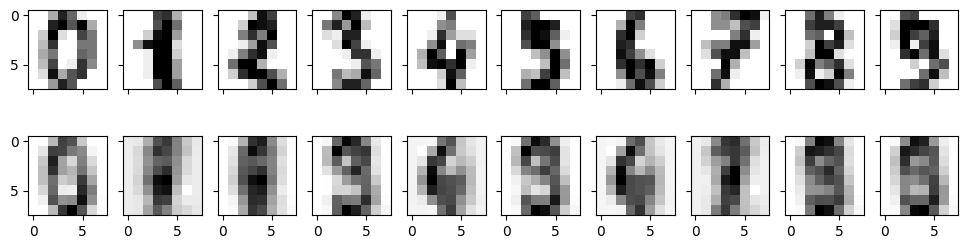

In [13]:
fig = plt.figure(figsize=(12,3))
axes = fig.subplots(2,10, sharex=True, sharey=True)
for i in range(10):
    axes[0,i].imshow(make2D(X[i]), cmap=plt.cm.binary)

for i in range(10):
    axes[1,i].imshow(make2D(X_[i]), cmap=plt.cm.binary)

# Choosing the right `n_components`

# Error in Reduction

In [14]:
# RMSE
def rmse(X, X_):
    'Calculate the Root Mean Square error between the original and transformed data'
    return np.sqrt(np.sum((X_ - X)**2)/len(X))

In [15]:
def calc_errors(ndims_min, ndims_max):
    'Returns a list of errors for all dimensions from `ndims_min` to `ndims_max`'
    errors = []
    for n_components in range(ndims_min,ndims_max+1):
        pca = PCA(n_components)
        Xproj = pca.fit_transform(X)
        X_ = pca.inverse_transform(Xproj)
        errors.append(rmse(X, X_))
        
    return errors

# Exercise 3

To be able to decide the right number of dimensions to reduce the data to, we will want to calculate the error in reduction. Two functions `rmse()` and `calc_errors()` are defined for your use.

1. Calculate the Root Mean Square error (`error`) using the `rmse()` function defined above, for the data `X_` that we transformed from `X` in the last exercise
2. Calculate all the `errors` for all dimensions from ndimension_min(i.e., 2) through ndimension_min(i.e.,64) (by calling `calc_error()` defined above)
3. Observe the plot of the errors and try deducing an optimal point that reduces dimensions yet keeps error acceptable

In [16]:
error = rmse(X, X_)
error

29.307759737802296

In [17]:
ndimension_min = 2
ndimension_max = 64
errors = calc_errors(ndimension_min, ndimension_max)
errors

[29.30775973780226,
 26.781248003337687,
 24.823197418091965,
 23.381972701164425,
 22.08259531165526,
 20.875524504774084,
 19.793878174010658,
 18.748508553322587,
 17.734616997476486,
 16.911923505858013,
 16.084346101614898,
 15.38957412471435,
 14.680183344386895,
 14.067367543798552,
 13.451485527646456,
 12.849174110027514,
 12.252010389967484,
 11.742151983827513,
 11.26934034025513,
 10.785015221204038,
 10.331268275948842,
 9.875517340168631,
 9.424731057448987,
 8.970093831619316,
 8.561866417768004,
 8.147765758629104,
 7.758654436934248,
 7.369915603098703,
 7.011391089761249,
 6.683927277573869,
 6.358126605666046,
 6.031653635642683,
 5.695672952232994,
 5.360430197567323,
 5.020445165087963,
 4.703394699621476,
 4.402860857882556,
 4.088331777274967,
 3.764859189136069,
 3.448542832386224,
 3.1601054931097208,
 2.858340822147426,
 2.545798165738693,
 2.2538625244984676,
 1.9463803569739933,
 1.621760535582607,
 1.3036124557311832,
 1.0148534877585778,
 0.737653625517370

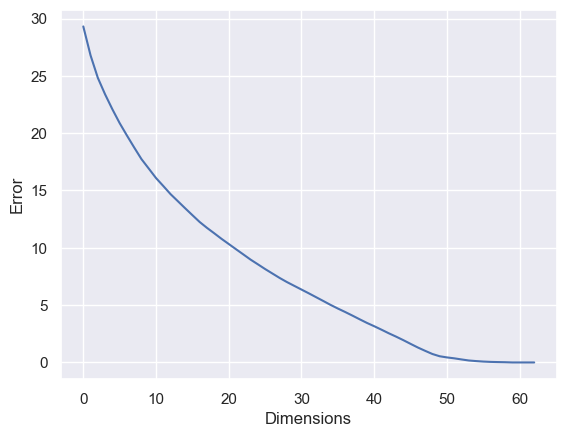

In [18]:
sns.set()
plt.xlabel('Dimensions')
plt.ylabel('Error')
plt.plot(errors);

# Explained Variance

# Observe

- The same thing can be deduced by plotting the explained variance ratio
- Try deducing the right number of dimensions to reduce to factor for 90% of the variance

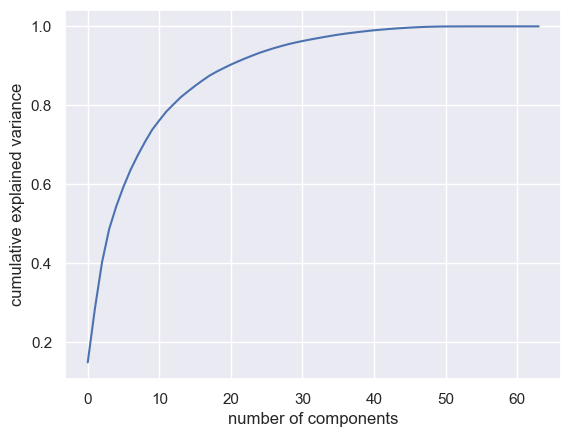

In [19]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Exercise 4

1. Create a final model that will explain 90% of the variance (Please leave the random_state variable for predictability in validating responses)
2. Check the number of dimensions it reduces the data to

In [21]:
pca = PCA(n_components=0.9,
          random_state=1)
Xproj = pca.fit_transform(X)
reduced_shape = Xproj.shape
reduced_shape

(1797, 21)

# End

In [22]:
X_ = pca.inverse_transform(Xproj)

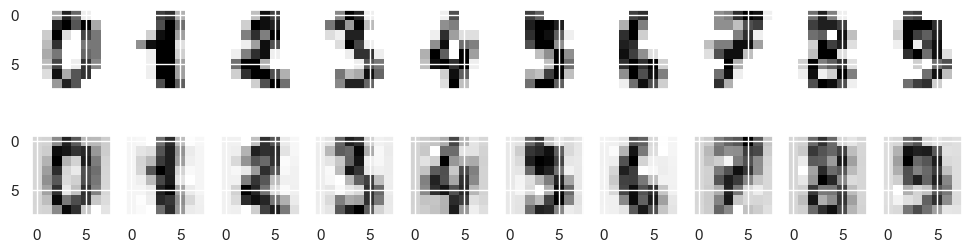

In [23]:
fig = plt.figure(figsize=(12,3))
axes = fig.subplots(2,10, sharex=True, sharey=True)
for i in range(10):
    axes[0,i].imshow(make2D(X[i]), cmap=plt.cm.binary)

for i in range(10):
    axes[1,i].imshow(make2D(X_[i]), cmap=plt.cm.binary)